In [43]:


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')




In [44]:
data = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [45]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [46]:
# check if the dataset contain null value or not?

data.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [47]:
# Exploring transaction type.

data.duplicated().value_counts()


False    6362620
dtype: int64

In [ ]:
feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']


for i in enumerate(feature):
    plt.subplot(6,1,i[0]+1)
    sns.displot(data[i[1]],bins=5)


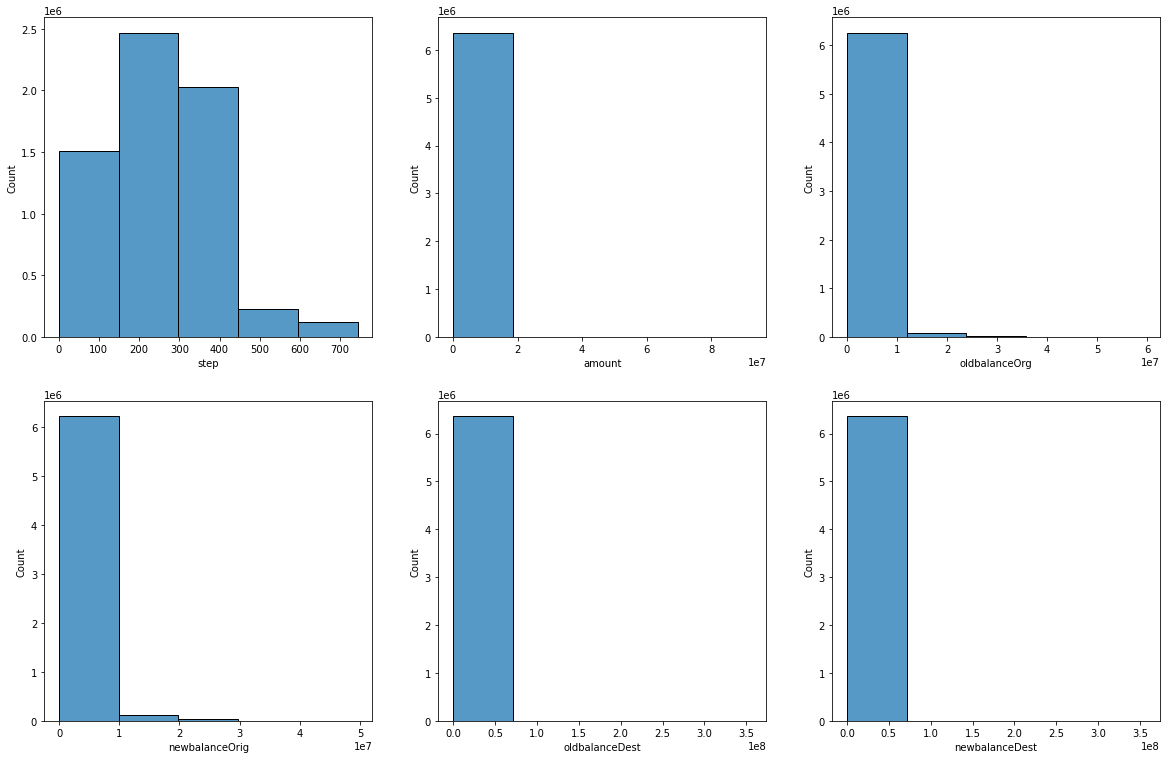

In [54]:
feature1=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

plt.figure(figsize=(20,20))

for i in enumerate(feature1):
    plt.subplot(3,3,i[0]+1)
    sns.histplot(data[i[1]],bins=5)


In [50]:

type1 = data["type"].value_counts()
transactions = type1.index
quantity = type1.values
figure = px.pie(data, values=quantity, names=(transactions), hole = 0.5, title="Distribution of Transaction Type")
figure.show()


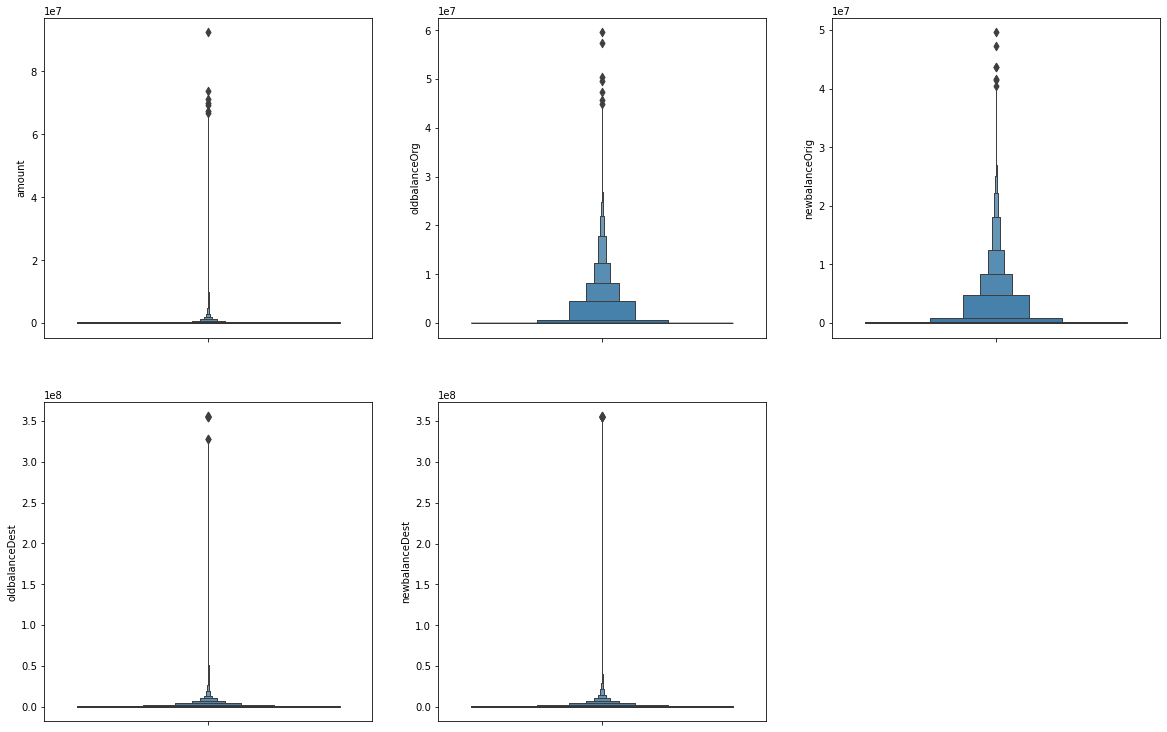

In [58]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

plt.figure(figsize=(20,20))

for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxenplot(y=data[i[1]])

In [59]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = data[i].quantile(0.10)
    upper = data[i].quantile(0.90)
    data[i] = np.where(data[i] <lower, lower,data[i])
    data[i] = np.where(data[i] >upper, upper,data[i])
    print('Feature: ',i)
    print('Skewness value: ',data[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




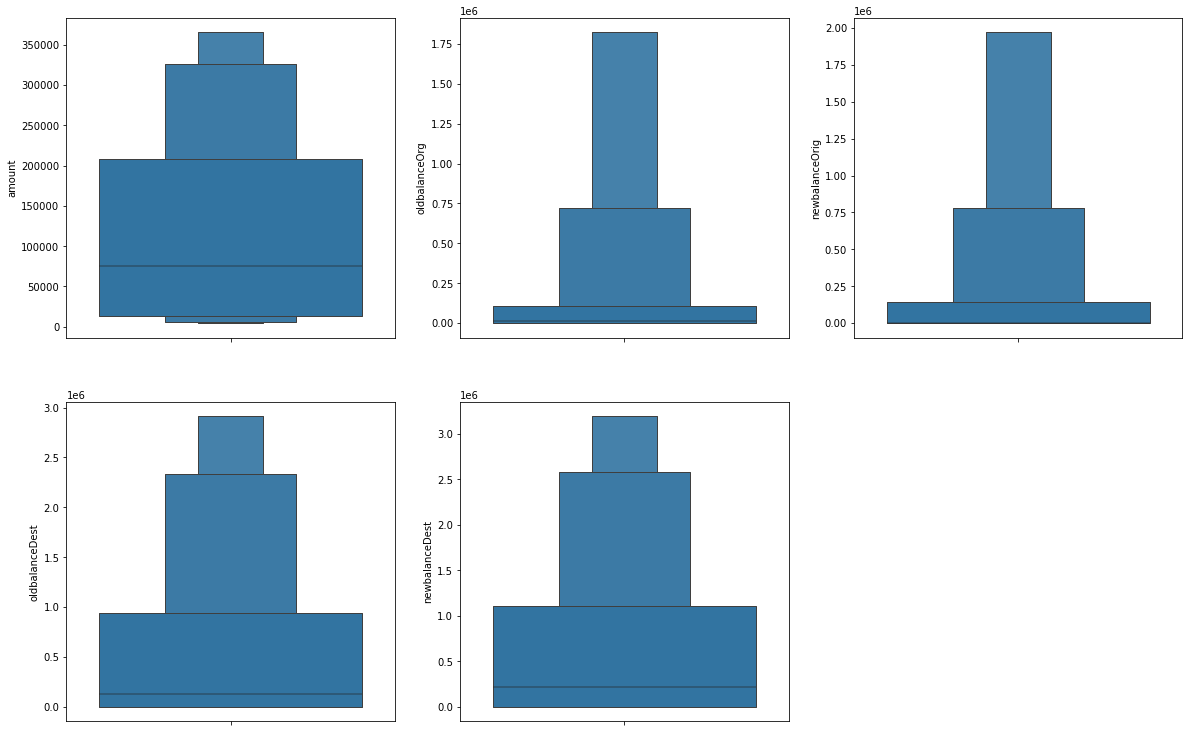

In [61]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

plt.figure(figsize=(20,20))

for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxenplot(y=data[i[1]])

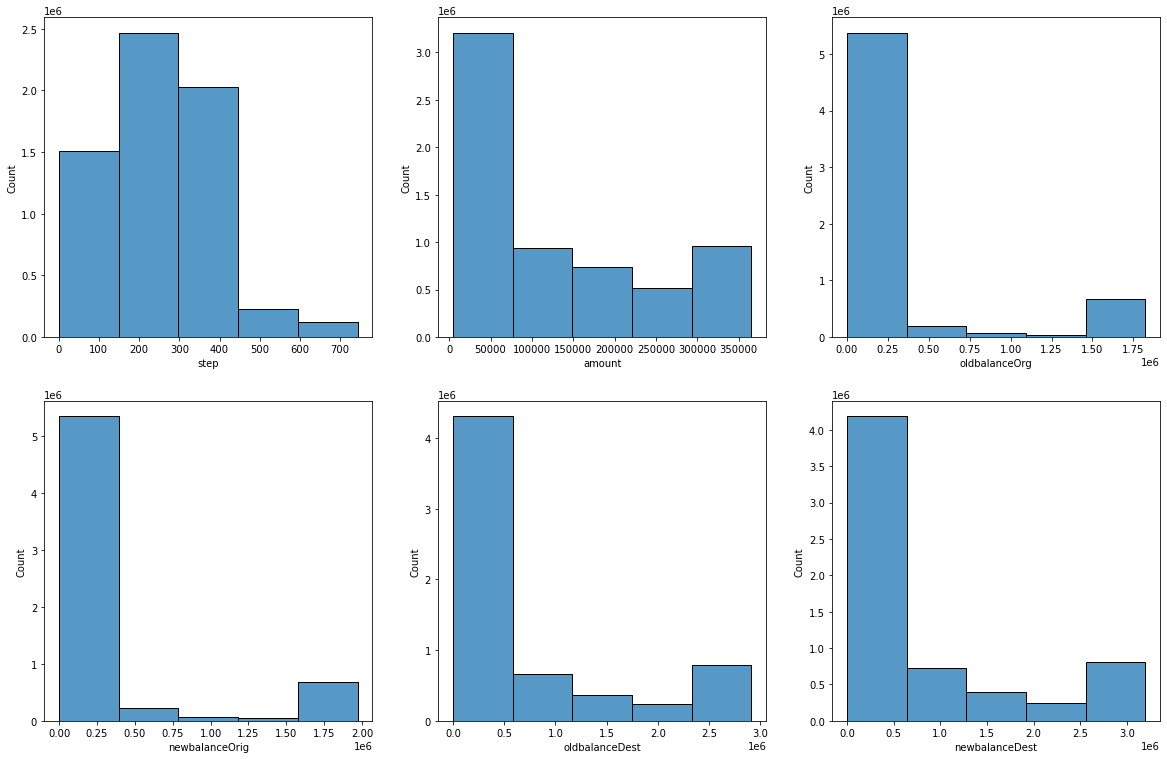

In [62]:
feature1=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

plt.figure(figsize=(20,20))

for i in enumerate(feature1):
    plt.subplot(3,3,i[0]+1)
    sns.histplot(data[i[1]],bins=5)


In [63]:
CrosstabResult=pd.crosstab(index=data.type,columns=data.isFraud)
CrosstabResult

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


(3500.0, 7000.0)

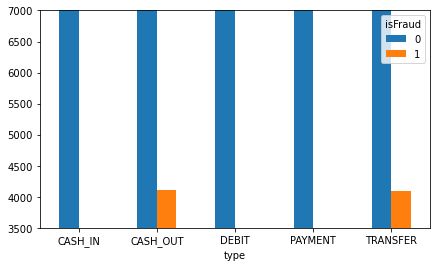

In [64]:
# Grouped bar chart between TYPE and ISFRAUD by changing ylimit to view isFraud values
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.ylim([3500, 7000])

<AxesSubplot:>

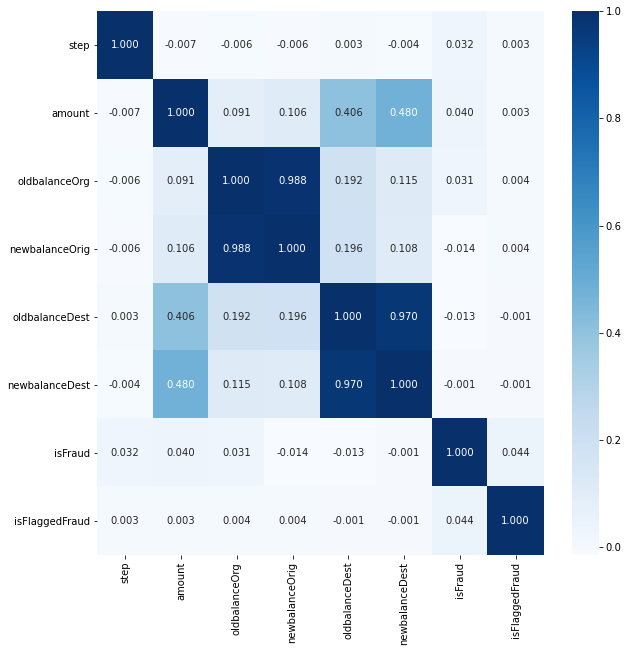

In [77]:
# calculate correlation matrix
plt.figure(figsize=(10,10))

corr = data.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")